In [14]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.integrate
from collections import Counter

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

In [92]:
def watershed_summary(filename):
    f = h5py.File(filename, 'r')
    watershed = f['watershed_group'][...]
    f.close()
    counts = Counter(watershed.flatten())
    clusters = np.array(list(counts.items()))
    cluster_n_size = clusters[:,1]
    cluster_radius = (3.0*(cluster_n_size*(720/320)**3)/(4.0*np.pi))**(1/3)
    return {'mean_radius':np.mean(cluster_radius), 'std_radius':np.std(cluster_radius), 
            'N':len(cluster_n_size), 'max_radius':np.max(cluster_radius)}

In [93]:
#data = np.array([sigma_vals, half_r_mock, half_r_sim])
length_data = np.loadtxt("correlation_length.dat")
#R_s R_dd_gaussian_field R_dd_biased_tracers
length_data

array([[ 2. ,  6.5,  3. ],
       [ 6. , 17.3,  9.6],
       [10. , 27.2, 16.6],
       [14. , 37.5, 22.4],
       [20. , 51.6, 28. ]])

In [94]:
ws = {}
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "watershed_mock_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{:.1f}_nside_360.hdf5".format(sigma)
    ws['abacus_{:.2f}'.format(sigma*2)] = watershed_summary(filename)

In [95]:
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "watershed_mock_divergence_mesh_360_box_720_slim_{}.h5".format(int(sigma*2))
    ws['gauss_{:.2f}'.format(sigma*2)] = watershed_summary(filename)

In [98]:
max_r_abacus = []
max_r_gauss = []

mean_r_abacus = []
mean_r_gauss = []

std_r_abacus = []
std_r_gauss = []

n_abacus = []
n_gauss = []


sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    max_r_abacus.append(ws["abacus_{:.2f}".format(sigma*2)]["max_radius"])
    max_r_gauss.append(ws["gauss_{:.2f}".format(sigma*2)]["max_radius"])
    mean_r_abacus.append(ws["abacus_{:.2f}".format(sigma*2)]["mean_radius"])
    mean_r_gauss.append(ws["gauss_{:.2f}".format(sigma*2)]["mean_radius"])
    std_r_abacus.append(ws["abacus_{:.2f}".format(sigma*2)]["std_radius"])
    std_r_gauss.append(ws["gauss_{:.2f}".format(sigma*2)]["std_radius"])
    n_abacus.append(ws["abacus_{:.2f}".format(sigma*2)]["N"])
    n_gauss.append(ws["gauss_{:.2f}".format(sigma*2)]["N"])

max_r_abacus = np.array(max_r_abacus)
max_r_gauss = np.array(max_r_gauss)
    
mean_r_abacus = np.array(mean_r_abacus)
mean_r_gauss = np.array(mean_r_gauss)

std_r_abacus = np.array(std_r_abacus)
std_r_gauss = np.array(std_r_gauss)

n_abacus = np.array(n_abacus)
n_gauss = np.array(n_gauss)

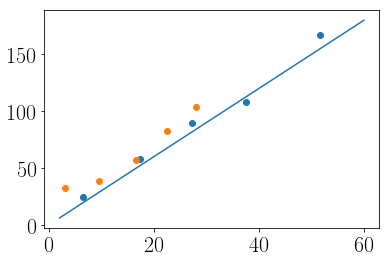

In [100]:
x = np.linspace(2,60, 100)
plt.scatter(length_data[:,1], max_r_gauss)
plt.scatter(length_data[:,2], max_r_abacus)
plt.plot(x, x*3)

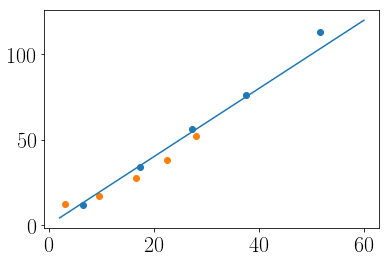

In [80]:
x = np.linspace(2,60, 100)
plt.scatter(length_data[:,1], mean_r_gauss)
plt.scatter(length_data[:,2], mean_r_abacus)
plt.plot(x, x*2)

[]

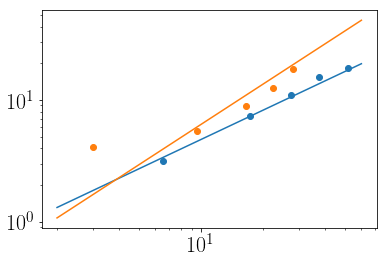

In [120]:
x = np.linspace(2,60, 100)
plt.scatter(length_data[:,1], std_r_gauss)
plt.scatter(length_data[:,2], std_r_abacus)
plt.plot(x,0.75*(x**0.8))
plt.plot(x,0.5*(x**1.1))
plt.loglog()


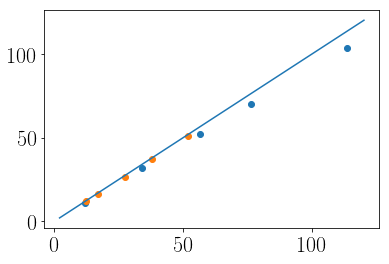

In [91]:
x = np.linspace(2,120, 100)
plt.scatter(mean_r_gauss, (3.0*((720**3)/n_gauss)/(4.0*np.pi))**(1/3))
plt.scatter(mean_r_abacus, (3.0*((720**3)/n_abacus)/(4.0*np.pi))**(1/3))
plt.plot(x, x)